<a href="https://colab.research.google.com/github/shreyassks/Learning-Content/blob/master/HR_analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [835]:
df_train = pd.read_csv("/content/train_LZdllcl.csv")
df_test = pd.read_csv("/content/test_2umaH9m.csv")

df_train['source'] = "True" 
df_test['source'] = "False"

df = pd.concat([df_train,df_test], sort = False)
df.head(5)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,source
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0.0,True
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0.0,True
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0.0,True
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0.0,True
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0.0,True


In [836]:
df.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted             float64
source                   object
dtype: object

In [837]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78298 entries, 0 to 23489
Data columns (total 15 columns):
employee_id             78298 non-null int64
department              78298 non-null object
region                  78298 non-null object
education               74855 non-null object
gender                  78298 non-null object
recruitment_channel     78298 non-null object
no_of_trainings         78298 non-null int64
age                     78298 non-null int64
previous_year_rating    72362 non-null float64
length_of_service       78298 non-null int64
KPIs_met >80%           78298 non-null int64
awards_won?             78298 non-null int64
avg_training_score      78298 non-null int64
is_promoted             54808 non-null float64
source                  78298 non-null object
dtypes: float64(2), int64(7), object(6)
memory usage: 9.6+ MB


In [838]:
df.isna().sum()

employee_id                 0
department                  0
region                      0
education                3443
gender                      0
recruitment_channel         0
no_of_trainings             0
age                         0
previous_year_rating     5936
length_of_service           0
KPIs_met >80%               0
awards_won?                 0
avg_training_score          0
is_promoted             23490
source                      0
dtype: int64

In [839]:
df.isna().sum()

employee_id                 0
department                  0
region                      0
education                3443
gender                      0
recruitment_channel         0
no_of_trainings             0
age                         0
previous_year_rating     5936
length_of_service           0
KPIs_met >80%               0
awards_won?                 0
avg_training_score          0
is_promoted             23490
source                      0
dtype: int64

In [840]:
from scipy.stats import mode

education_mode = df.pivot_table(values = "education", index = "gender", aggfunc = (lambda x: mode(x).mode[0]))
education_mode

,education
gender,
f,Bachelor's
m,Bachelor's


In [0]:
mis_boolean = df['education'].isna()
df.loc[mis_boolean,"education"] = df.loc[mis_boolean,"gender"].apply(lambda x: education_mode.loc[x])

In [842]:
df['department'].value_counts()

Sales & Marketing    24155
Operations           16112
Procurement          10158
Technology           10149
Analytics             7671
Finance               3627
HR                    3503
Legal                 1484
R&D                   1439
Name: department, dtype: int64

In [843]:
df['education'].value_counts()

Bachelor's          55690
Master's & above    21429
Below Secondary      1179
Name: education, dtype: int64

In [844]:
df['gender'].value_counts()

m    55092
f    23206
Name: gender, dtype: int64

In [845]:
df['recruitment_channel'].value_counts()

other       43524
sourcing    33181
referred     1593
Name: recruitment_channel, dtype: int64

In [846]:
service = df['length_of_service'].unique()
np.sort(service)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       37])

In [847]:
age = df['age'].unique()
np.sort(age)

array([20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55, 56, 57, 58, 59, 60])

In [848]:
df['KPIs_met >80%'].value_counts()

0    50578
1    27720
Name: KPIs_met >80%, dtype: int64

In [849]:
df_train['is_promoted'].value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

In [850]:
df.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted             float64
source                   object
dtype: object

In [0]:
'''
replace() function in pandas will help us to rename the values in a particular column
'''
dict1 = {'m':'male','f':'female'}
df_train['gender'].replace(dict1, inplace = True) 

In [852]:
'''
cross tab will give the feel of data we have. the description of columns we include will be displayed here
'''
pd.crosstab(df_train["is_promoted"],df_train["gender"],margins=True)

gender,female,male,All
is_promoted,,,
0,14845,35295,50140
1,1467,3201,4668
All,16312,38496,54808


In [853]:
k = pd.crosstab(df_train['department'],df_train['is_promoted'], margins = True)
k

is_promoted,0,1,All
department,,,
Analytics,4840,512,5352
Finance,2330,206,2536
HR,2282,136,2418
Legal,986,53,1039
Operations,10325,1023,11348
Procurement,6450,688,7138
R&D,930,69,999
Sales & Marketing,15627,1213,16840
Technology,6370,768,7138


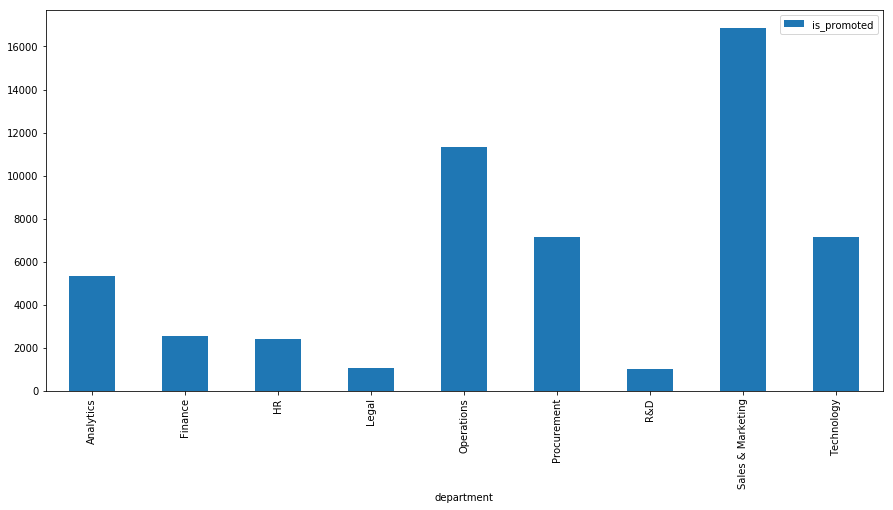

In [854]:
dept_prom = df_train.groupby('department').agg({'is_promoted':'count'})
dept_prom.plot(kind = 'bar', figsize = (15,7))

In [855]:
(k[1].values/k[0].values)

array([0.10578512, 0.08841202, 0.05959684, 0.05375254, 0.0990799 ,
       0.10666667, 0.07419355, 0.07762206, 0.12056515, 0.09309932])

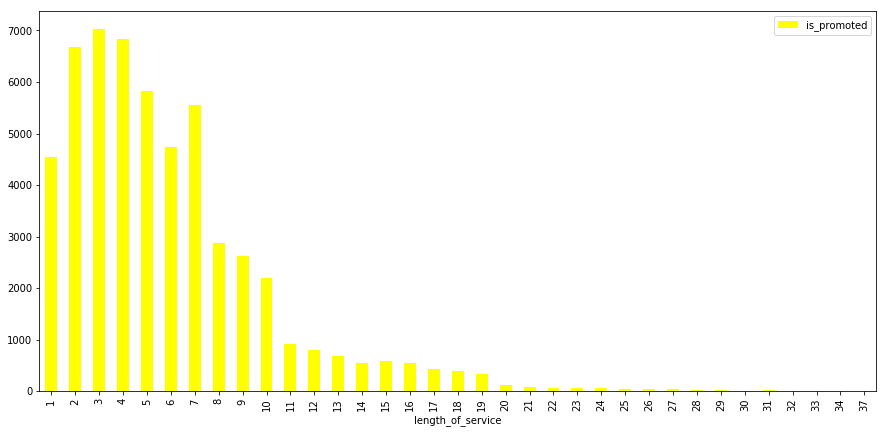

In [856]:
'''
Based on length of service, the number of employees promoted based on their eligibility 
Employees having work experience of 2-4 years have been promoted 
'''

service_promoted = df_train.groupby('length_of_service').agg({'is_promoted':'count'})
service_promoted.plot(kind = 'bar', figsize = (15,7),color = 'yellow')

In [857]:
service_promoted['is_promoted'].values.sum()

54808

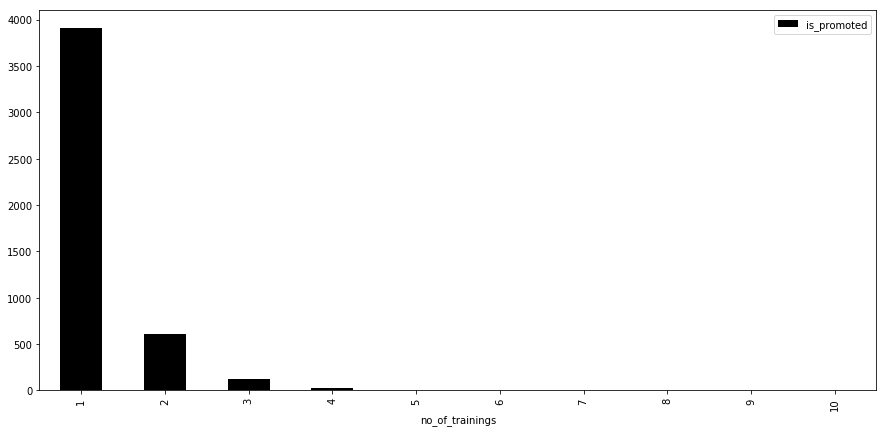

In [858]:
trainings = df_train.groupby('no_of_trainings').agg({"is_promoted":'sum'})
trainings.plot(kind = 'bar',figsize = (15,7),color = 'black')

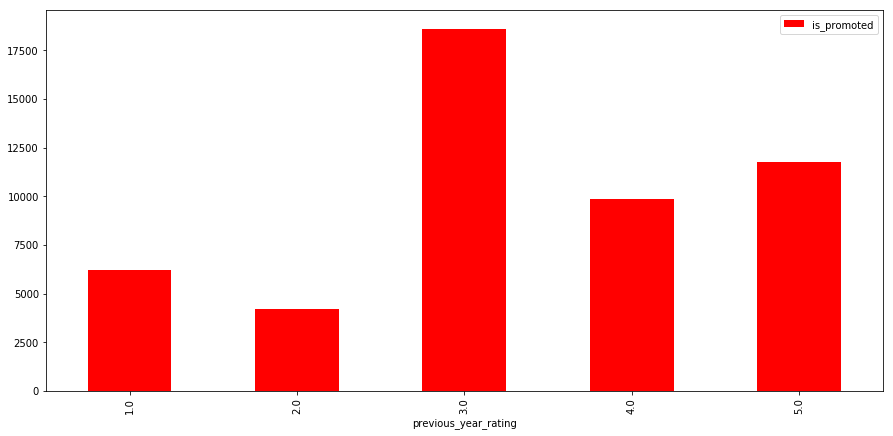

In [859]:
rating = df_train.groupby('previous_year_rating').agg({"is_promoted":'count'})
rating.plot(kind = 'bar',figsize = (15,7),color = 'red')

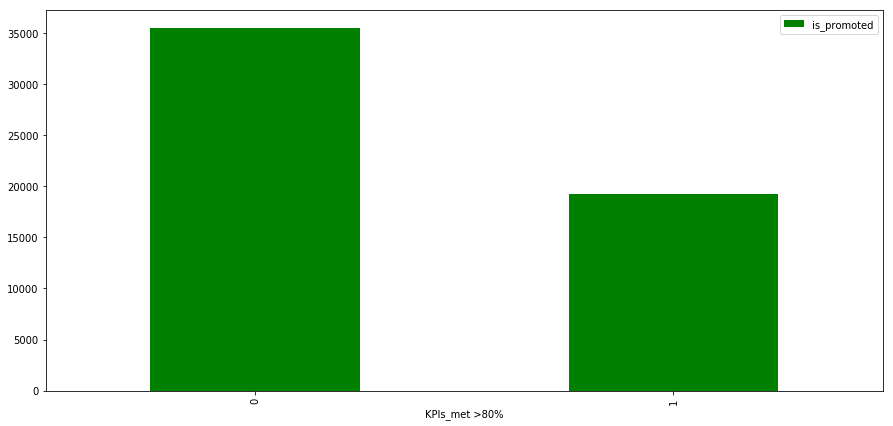

In [860]:
kpi = df_train.groupby('KPIs_met >80%').agg({"is_promoted":'count'})
kpi.plot(kind = 'bar',figsize = (15,7),color = 'green') 

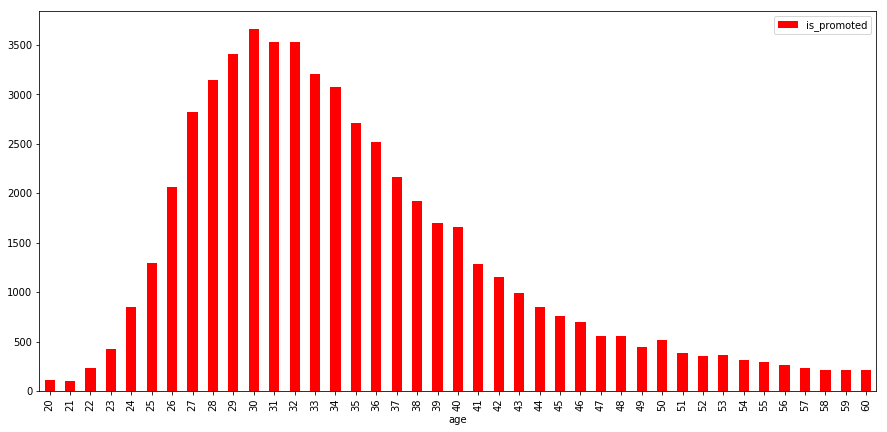

In [861]:
'''
Employees in the age group 26-37 years have been shortlisted for promotion
'''
age = df_train.groupby('age').agg({"is_promoted":'count'})
age.plot(kind = 'bar',figsize = (15,7),color = 'red') 

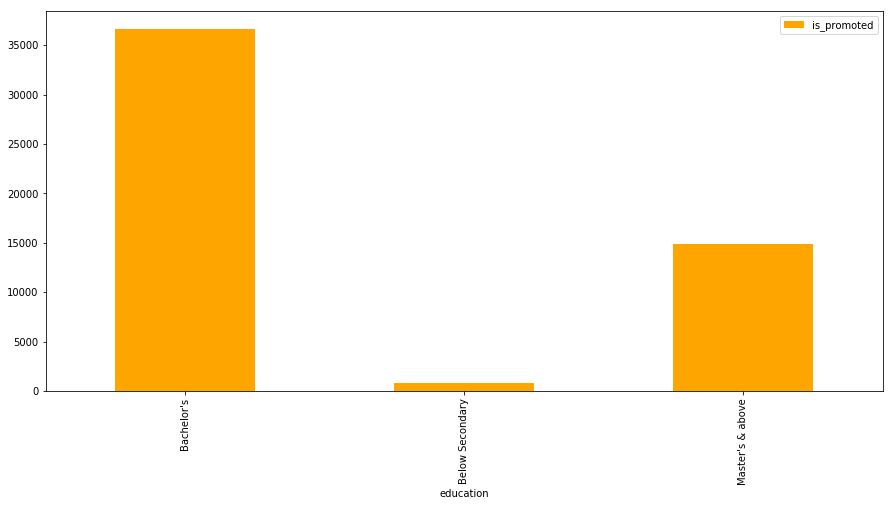

In [862]:
edu = df_train.groupby('education').agg({"is_promoted":'count'})
edu.plot(kind = 'bar',figsize = (15,7),color = 'orange') 

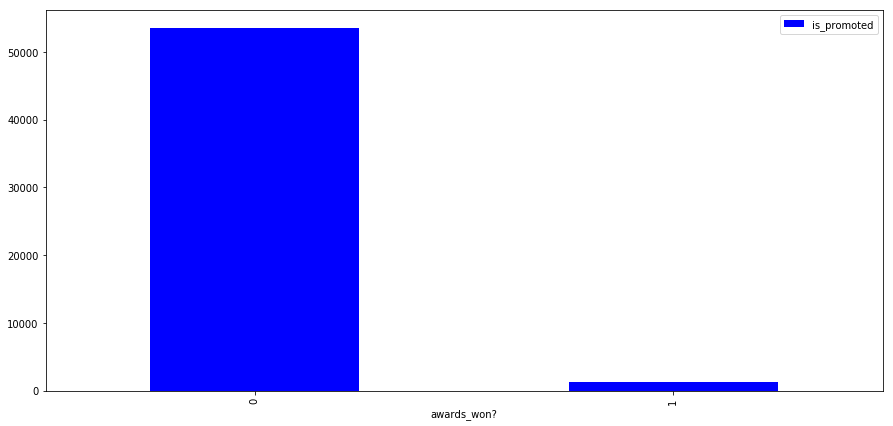

In [863]:
awards = df_train.groupby('awards_won?').agg({"is_promoted":'count'})
awards.plot(kind = 'bar',figsize = (15,7),color = 'blue') 

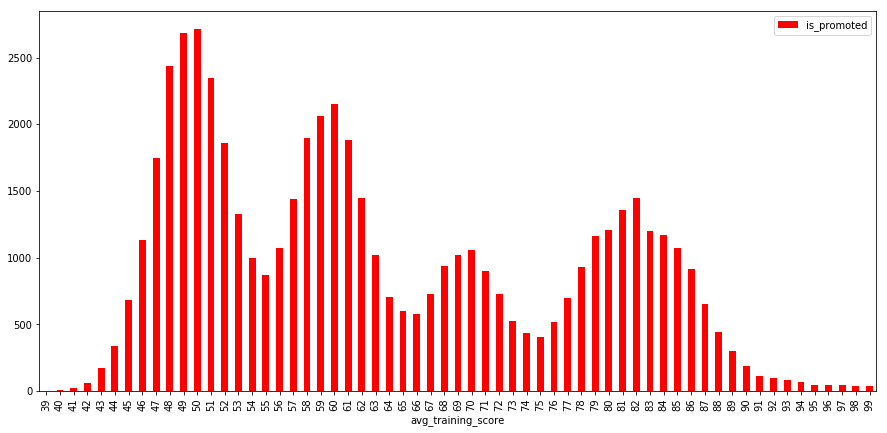

In [864]:
score = df_train.groupby('avg_training_score').agg({"is_promoted":'count'})
score.plot(kind = 'bar',figsize = (15,7),color = 'red') 

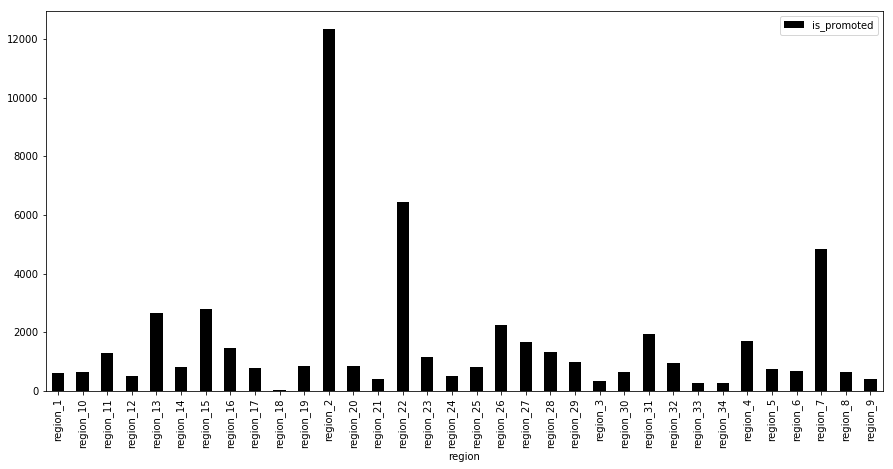

In [865]:
region = df_train.groupby('region').agg({"is_promoted":'count'})
region.plot(kind = 'bar',figsize = (15,7),color = 'black')

In [0]:
df.drop(['region','recruitment_channel','previous_year_rating'], axis = 1, inplace = True)

In [867]:
df.shape

(78298, 12)

In [868]:
df.columns

Index(['employee_id', 'department', 'education', 'gender', 'no_of_trainings',
       'age', 'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted', 'source'],
      dtype='object')

In [869]:
df.dtypes

employee_id             int64
department             object
education              object
gender                 object
no_of_trainings         int64
age                     int64
length_of_service       int64
KPIs_met >80%           int64
awards_won?             int64
avg_training_score      int64
is_promoted           float64
source                 object
dtype: object

In [0]:
# One hot encoding of Categorical Variables
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

categ_variables = ['department','gender','education']

for i in categ_variables:
  df[i] = le.fit_transform(df[i])

In [871]:
df = pd.get_dummies(df, columns = ['department','gender','education'])
df.dtypes

employee_id             int64
no_of_trainings         int64
age                     int64
length_of_service       int64
KPIs_met >80%           int64
awards_won?             int64
avg_training_score      int64
is_promoted           float64
source                 object
department_0            uint8
department_1            uint8
department_2            uint8
department_3            uint8
department_4            uint8
department_5            uint8
department_6            uint8
department_7            uint8
department_8            uint8
gender_0                uint8
gender_1                uint8
education_0             uint8
education_1             uint8
education_2             uint8
dtype: object

In [872]:
train = df.loc[df['source'] == "True"]
test = df.loc[df['source'] == "False"]

train.drop(['source'], axis = 1, inplace = True)
test.drop(['is_promoted','source'], axis = 1, inplace = True)

print(train.shape)
print(test.shape)

train.to_csv("train_mod", index = False)
test.to_csv("test_mod", index = False)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


(54808, 22)
(23490, 21)


In [873]:
train.columns

Index(['employee_id', 'no_of_trainings', 'age', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'is_promoted',
       'department_0', 'department_1', 'department_2', 'department_3',
       'department_4', 'department_5', 'department_6', 'department_7',
       'department_8', 'gender_0', 'gender_1', 'education_0', 'education_1',
       'education_2'],
      dtype='object')

In [874]:
train.dtypes

employee_id             int64
no_of_trainings         int64
age                     int64
length_of_service       int64
KPIs_met >80%           int64
awards_won?             int64
avg_training_score      int64
is_promoted           float64
department_0            uint8
department_1            uint8
department_2            uint8
department_3            uint8
department_4            uint8
department_5            uint8
department_6            uint8
department_7            uint8
department_8            uint8
gender_0                uint8
gender_1                uint8
education_0             uint8
education_1             uint8
education_2             uint8
dtype: object

In [875]:
test.isna().sum()

employee_id           0
no_of_trainings       0
age                   0
length_of_service     0
KPIs_met >80%         0
awards_won?           0
avg_training_score    0
department_0          0
department_1          0
department_2          0
department_3          0
department_4          0
department_5          0
department_6          0
department_7          0
department_8          0
gender_0              0
gender_1              0
education_0           0
education_1           0
education_2           0
dtype: int64

In [0]:
#Define target and ID columns:
target = 'is_promoted'
IDcol = ['employee_id']

from sklearn.model_selection import cross_val_score
from sklearn import metrics

def modelfit(alg, dtrain, dtest, predictors, target, IDcol, filename):
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target])
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])

    #Perform cross-validation:
    cv_score = cross_val_score(alg, dtrain[predictors], dtrain[target], cv=5, scoring='f1')
    
    #Print model report:
    print("\nModel Report")
    print("F1_score", metrics.f1_score(dtrain[target].values, dtrain_predictions))
    
    #Predict on testing data:
    dtest[target] = alg.predict(dtest[predictors])
    
    #Export submission file:
    IDcol.append(target)
    submission = pd.DataFrame({ x: dtest[x] for x in IDcol})
    submission.to_csv(filename, index=False)

In [877]:
from sklearn.ensemble import RandomForestClassifier
predictors = [x for x in train.columns if x not in [target]+IDcol]
predictors

['no_of_trainings',
 'age',
 'length_of_service',
 'KPIs_met >80%',
 'awards_won?',
 'avg_training_score',
 'department_0',
 'department_1',
 'department_2',
 'department_3',
 'department_4',
 'department_5',
 'department_6',
 'department_7',
 'department_8',
 'gender_0',
 'gender_1',
 'education_0',
 'education_1',
 'education_2']


Model Report
F1_score 0.3921766987017367


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


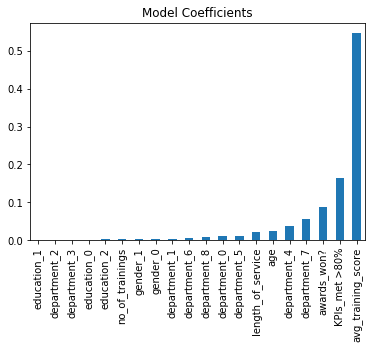

In [878]:
alg2 = RandomForestClassifier(n_estimators = 400, max_features = 7, n_jobs = 5, min_samples_leaf = 50)
modelfit(alg2, train, test, predictors, target, IDcol, 'alg2.csv')
coef2 = pd.Series(alg2.feature_importances_, predictors).sort_values()
coef2.plot(kind='bar', title='Model Coefficients')


Model Report
F1_score 0.5137585991244529


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


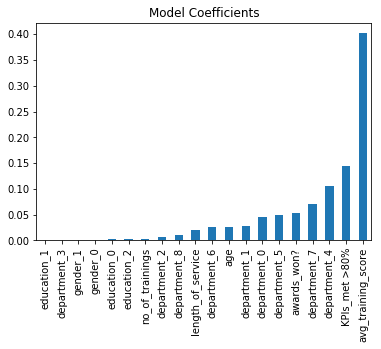

In [879]:
from sklearn.ensemble import GradientBoostingClassifier
predictors = [x for x in train.columns if x not in [target]+IDcol]

alg3 = GradientBoostingClassifier(n_estimators = 400,  min_samples_leaf = 50, subsample = 0.65, learning_rate = 0.15, loss = 'deviance')
modelfit(alg3, train, test, predictors, target, IDcol, 'alg3.csv')
coef3 = pd.Series(alg3.feature_importances_, predictors).sort_values()
coef3.plot(kind='bar', title='Model Coefficients')